# `networkx`partie 2

## Colorer les sommets
On va dans un premier temps s'intéresser aux couleurs des sommets d'un graphe.

Reprenons un exemple simple :

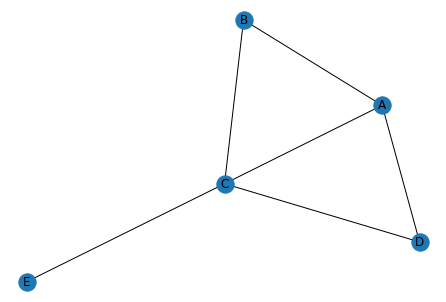

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([("A", "B"), ("B", "C"), ("C", "D"),
                  ("D", "A"), ("A", "C"), ("C", "E")])

plt.clf()
nx.draw(G, with_labels=True)
plt.show()


Si l'on veut colorer les sommets du graphe, il faut fournir une liste de couleurs.
Il faut donc connaître l'ordre des sommets (qui dépend de la manière dont on a construit le graphe).

Cet ordre est indiqué par `G.nodes`:

In [4]:
G.nodes

NodeView(('A', 'B', 'C', 'D', 'E'))

Ainsi on peut utiliser une liste de couleurs pour dessiner le graphe :

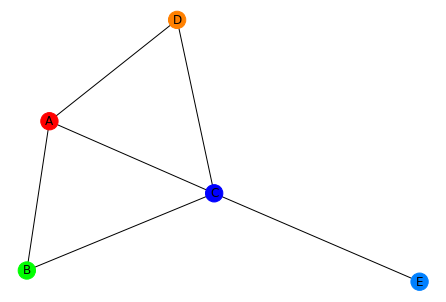

In [5]:
color_list =[(1,0,0),(0,1,0),(0,0,1),(1,0.5,0),(0,0.5,1)] # valeurs RGV entre 0 et 1
plt.clf()
nx.draw(G, with_labels=True,node_color=color_list)
plt.show()

On n'est pas obliger de se soucier des couleurs en elles-mêmes : on peut juste fixer des numéros de couleurs
et `networkx` fera le reste... comme il veut :

[0, 1, 2, 3, 4]


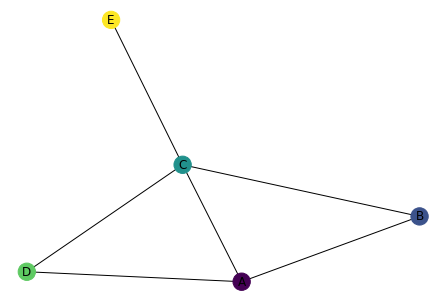

In [6]:
color_list = list(range(len(G.nodes)))
print(color_list)
plt.clf()
nx.draw(G, with_labels=True,node_color=color_list)
plt.show()

Une méthode pratique consiste à définir un dictionnaire de couleurs
- qui pourra être mis à jour au sein d'un algorithme;
- que l'on pourra transformer en liste de couleurs lors du dessin final.

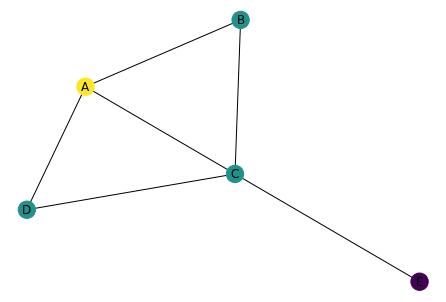

In [7]:
color_dict = {n : 0 for n in G.nodes} # on "colore" tous les sommets avec 0
for n in G.neighbors('A'): # on selectionne tous les voisins de A
    color_dict[n]=1 # on les colore avec 1
color_dict['A'] = 2 # et on colore A avec 2

# on fabrique la liste de couleur en respectant l'ordre dans G.nodes :

color_list = []
for n in G.nodes:
    color_list.append(color_dict[n])

# on passe au dessin

plt.clf()
nx.draw(G, with_labels=True,node_color=color_list)
plt.show()

## Un algorithme de coloration

On va utiliser un algorithme "naïf" pour colorer les sommets de telle sorte que 2 sommets voisins
aient des couleurs différentes.

Partons d'un graphe de départ dont les sommets ne sont pas coloriés.
<img src = "00.png" width=50%>
**Choisissons A pour premier sommet**

A n'a aucun voisin colorié, donc on peut le colorer avec une couleur de notre choix : la couleur 0.
<img src = "01.png" width=50%>
**Choisissons B**

Il possède un voisin colorié en 0 donc on le colorie avec une nouvelle couleur : la couleur 1.
<img src = "02.png" width=50%>
**Choisissons C**

Il possède deux voisin coloriés avec 0 et 1 donc on le colorie avec une nouvelle couleur : la couleur 2.
<img src = "03.png" width=50%>
**Choisissons D**

Il possède un voisin colorié avec 0 donc on peut le colorier avec la couleur 1.
<img src = "04.png" width=50%>
**Choisissons E**

Il possède un voisin colorié avec 2 donc on peut le colorier avec la couleur 0.
<img src = "05.png" width=50%>
**Choisissons F**

Il possède 3 voisins coloriés avec 0,1 et 2 donc on le colorie avec une nouvelle couleur : la couleur 3.
<img src = "06.png" width=50%>

En définitive, on a colorié les sommets du graphe avec 4 couleurs.

Peut-on faire mieux ? Oui ! En effet, cet algorithme n'est pas optimal et, en particulier, donne une solution qui dépend de l'ordre dans lequel on parcourt les sommets du graphe.

Si par exemple on inverse l'ordre des 2 derniers sommets visités (A,B,C,D,F,E) on obtient ceci :
<img src = "07.png" width=50%>
Et là, 3 couleurs suffisent. On ne peut pas faire mieux à cause par exemple du cycle A-B-C

## À faire

On reprend l'algorithme du TP précédent, qui génère un graphe aléatoire.
Implémenter l'algorithme ci-dessus : il s'agit de construire un dictionnaire de couleurs, puis fabriquer la liste des couleurs et dessiner le graphe. La partie à implémenter est celle qui construit le dictionnaire

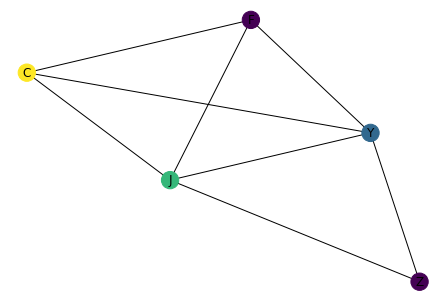

In [29]:

from random import randint, sample

node_name = "AZERTYUIOPQSDFGHJKLMWXCVBN"

n = randint(5, 10)
nodes = sample(node_name, n)
edges = []
for node in nodes:
    remaining_nodes = list(nodes)
    remaining_nodes.remove(node)
    extremities = sample(remaining_nodes, randint(1, 3))
    edges.extend([(node, e) for e in extremities])

G = nx.Graph()
G.add_edges_from(edges)
    
color_dict=dict()
nb_colors_used = 0
for n in G.nodes:
    available_colors = [True]*nb_colors_used
    for u in G.neighbors(n):
        if u in color_dict:
            available_colors[color_dict[u]]=False
    i = 0
    while i<nb_colors_used and available_colors[i]==False:
        i+=1
    if i == nb_colors_used:
        nb_colors_used += 1
    color_dict[n]=i

color_list = []
for u in G.nodes:
    color_list.append(color_dict[u])

plt.clf()
nx.draw(G, with_labels=True,node_color=color_list)
plt.show()